In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
dataset=pd.read_csv('C:/Users/Srishti/Desktop/Data Science/Machine Learning/Assignments/Assignment2_PGD B7/People Charm case.csv')
dataset.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
dataset.shape

(14999, 10)

In [4]:
#checking for the duplicate values:
dataset[dataset.duplicated()].shape

(3008, 10)

In [5]:
#checking for the null values:
dataset.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [6]:
#dropping the duplicate values and then storing the unique values in a new dataframe as 'new_dataset'
new_dataset=dataset.drop_duplicates()
new_dataset.shape

(11991, 10)

In [7]:
new_dataset.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [8]:
new_dataset['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [9]:
new_dataset['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
#converting the categorical data to numerical data:
le=LabelEncoder()
new_dataset['dept']=le.fit_transform(new_dataset['dept'])
new_dataset['salary']=le.fit_transform(new_dataset['salary'])
new_dataset.head()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


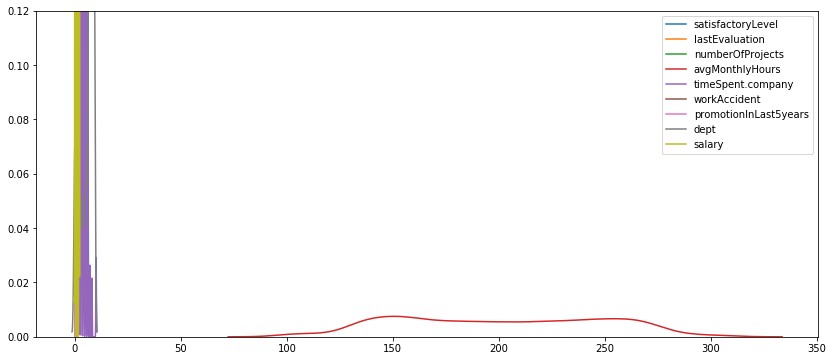

In [11]:
#checking for the independent data to be normally distributed or not
plt.figure(figsize=(14,6))
plt.ylim(0,0.12)
sns.kdeplot(new_dataset['satisfactoryLevel'])
sns.kdeplot(new_dataset['lastEvaluation'])
sns.kdeplot(new_dataset['numberOfProjects'])
sns.kdeplot(new_dataset['avgMonthlyHours'])
sns.kdeplot(new_dataset['timeSpent.company'])
sns.kdeplot(new_dataset['workAccident'])
sns.kdeplot(new_dataset['promotionInLast5years'])
sns.kdeplot(new_dataset['dept'])
sns.kdeplot(new_dataset['salary'])

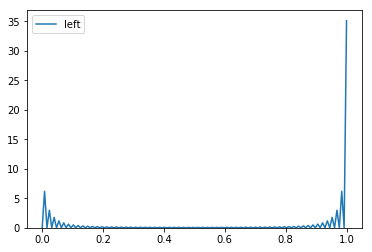

In [12]:
#checking for the dependent data to be normally distributed or not 
sns.kdeplot(new_dataset['left'])

In [13]:
new_dataset.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [14]:
#trying to normalize the data:
from sklearn.preprocessing import Normalizer
mmsc=Normalizer()
sc_data=mmsc.fit_transform(new_dataset)
sc_data=pd.DataFrame(sc_data)
sc_data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.002417,0.003371,0.012722,0.998696,0.019083,0.0,0.006361,0.0,0.044528,0.006361
1,0.003051,0.003280,0.019068,0.999153,0.022881,0.0,0.003814,0.0,0.026695,0.007627
2,0.000404,0.003233,0.025714,0.999191,0.014694,0.0,0.003673,0.0,0.025714,0.007347
3,0.002324,0.003266,0.012563,0.998729,0.018844,0.0,0.006281,0.0,0.043969,0.006281
4,0.002676,0.003263,0.013054,0.998627,0.019581,0.0,0.006527,0.0,0.045689,0.006527


In [15]:
sc_data.columns=new_dataset.columns
sc_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.002417,0.003371,0.012722,0.998696,0.019083,0.0,0.006361,0.0,0.044528,0.006361
1,0.003051,0.003280,0.019068,0.999153,0.022881,0.0,0.003814,0.0,0.026695,0.007627
2,0.000404,0.003233,0.025714,0.999191,0.014694,0.0,0.003673,0.0,0.025714,0.007347
3,0.002324,0.003266,0.012563,0.998729,0.018844,0.0,0.006281,0.0,0.043969,0.006281
4,0.002676,0.003263,0.013054,0.998627,0.019581,0.0,0.006527,0.0,0.045689,0.006527


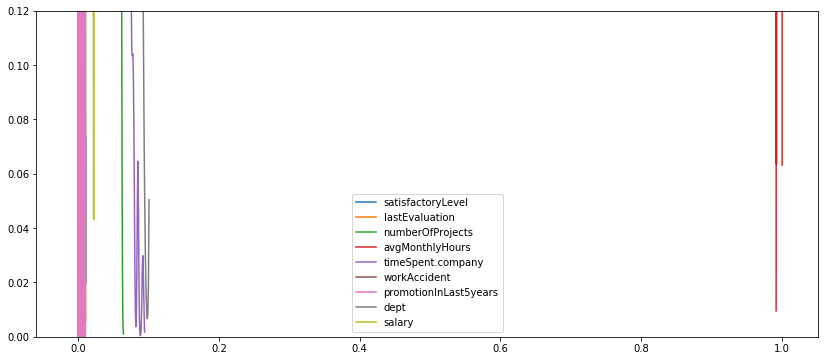

In [16]:
#checking for the independent data to be normally distributed or not after normalizing them:
plt.figure(figsize=(14,6))
plt.ylim(0,0.12)
sns.kdeplot(sc_data['satisfactoryLevel'])
sns.kdeplot(sc_data['lastEvaluation'])
sns.kdeplot(sc_data['numberOfProjects'])
sns.kdeplot(sc_data['avgMonthlyHours'])
sns.kdeplot(sc_data['timeSpent.company'])
sns.kdeplot(sc_data['workAccident'])
sns.kdeplot(sc_data['promotionInLast5years'])
sns.kdeplot(sc_data['dept'])
sns.kdeplot(sc_data['salary'])

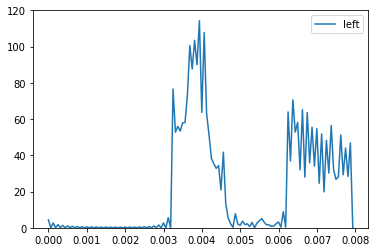

In [17]:
#checking for the dependent data to be normally distributed or not after normalizing it:
sns.kdeplot(sc_data['left'])

Note: Even though I have applied all the normalizing techniques previously but nothing is impacting much to get the data to be distributed normally. Therefore, I have used the data normally instead of using the normalized data. And also am not dropping any of the columns because each of the attributes are important and valid for leaving or not leaving a company.

In [18]:
#breaking the data into independent and dependent variable as X and Y respectively:
X=new_dataset[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'promotionInLast5years', 'dept', 'salary']]
Y=new_dataset['left']

In [19]:
X.shape

(11991, 9)

In [20]:
Y.shape

(11991,)

In [21]:
#splitting the data into training and testing set:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

### KNN:

In [22]:
##Fitting the KNN Classifier model for k=3:
knn=KNeighborsClassifier(n_neighbors=3) ##k=3
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [23]:
#Compute accuracy and display confusion matrix:
print('KNN Score=',knn.score(x_test,y_test)*100)   ##accuracy of the model

KNN Score= 93.78907878282618


In [24]:
cm=confusion_matrix(y_test,prediction)    
print('Confusion Matrix is:',cm,sep='\n')

Confusion Matrix is:
[[1911   96]
 [  53  339]]


In [25]:
probs=knn.predict_proba(x_test)
probs

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [26]:
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve',roc_auc)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

Area under the curve 0.9307856176850412
fpr [0.         0.02441455 0.04783259 0.10812157 1.        ]
tpr [0.         0.68112245 0.86479592 0.90816327 1.        ]
threshold [2.         1.         0.66666667 0.33333333 0.        ]


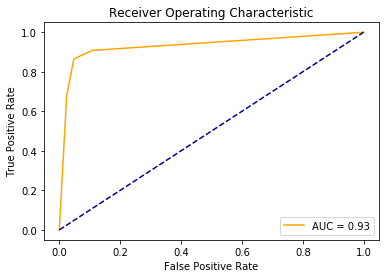

In [27]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression:

In [28]:
##Fitting the Logistic Regression model:

left_LR=LogisticRegression()
left_LR.fit(x_train,y_train)
prediction1=left_LR.predict(x_test)

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
#Compute accuracy and display confusion matrix:
score=left_LR.score(x_test,y_test)
print('Accuracy score:',score*100)

Accuracy score: 84.45185493955815


In [30]:
cm1=confusion_matrix(y_test,prediction1)
cm1

array([[1944,   63],
       [ 310,   82]], dtype=int64)

In [31]:
probs1=left_LR.predict_proba(x_test)
probs1

array([[0.82894335, 0.17105665],
       [0.90732579, 0.09267421],
       [0.96023243, 0.03976757],
       ...,
       [0.84732186, 0.15267814],
       [0.81230198, 0.18769802],
       [0.80857712, 0.19142288]])

In [32]:
prob_positive1=probs1[:,1]
fpr1,tpr1,threshold1=metrics.roc_curve(y_test,prob_positive1)
roc_auc1=metrics.auc(fpr1,tpr1)
print('Area under the curve',roc_auc1)
print('fpr',fpr1)
print('tpr',tpr1)
print('threshold',threshold1)

Area under the curve 0.8326291652684991
fpr [0.00000000e+00 4.98256104e-04 4.48430493e-03 4.48430493e-03
 1.09616343e-02 1.09616343e-02 1.19581465e-02 1.19581465e-02
 1.29546587e-02 1.29546587e-02 1.34529148e-02 1.34529148e-02
 1.49476831e-02 1.49476831e-02 1.64424514e-02 1.64424514e-02
 1.74389636e-02 1.74389636e-02 1.79372197e-02 1.79372197e-02
 1.84354758e-02 1.84354758e-02 1.89337319e-02 1.89337319e-02
 1.94319880e-02 1.94319880e-02 1.99302441e-02 1.99302441e-02
 2.09267564e-02 2.09267564e-02 2.14250125e-02 2.14250125e-02
 2.19232686e-02 2.19232686e-02 2.24215247e-02 2.24215247e-02
 2.34180369e-02 2.34180369e-02 2.49128052e-02 2.49128052e-02
 2.69058296e-02 2.69058296e-02 2.74040857e-02 2.74040857e-02
 2.79023418e-02 2.79023418e-02 2.84005979e-02 2.84005979e-02
 2.93971101e-02 2.93971101e-02 2.98953662e-02 2.98953662e-02
 3.08918784e-02 3.08918784e-02 3.13901345e-02 3.13901345e-02
 3.18883906e-02 3.18883906e-02 3.23866467e-02 3.23866467e-02
 3.38814150e-02 3.38814150e-02 3.43796712

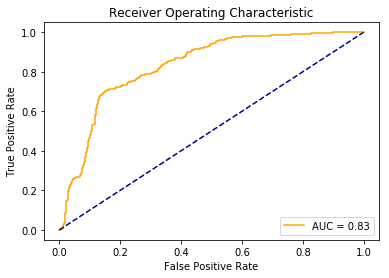

In [33]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1,tpr1,'orange',label='AUC = %0.2f'%roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Naive Bayes:

### Gaussian:

In [34]:
##Fitting the Gaussian model:

gnb=GaussianNB()
gnb.fit(x_train,y_train)
prediction2=gnb.predict(x_test)

In [35]:
#Compute accuracy and display confusion matrix:
print('accuracy in (%):',metrics.accuracy_score(y_test,prediction2)*100)

accuracy in (%): 85.32721967486452


In [36]:
cm2=confusion_matrix(y_test,prediction2)
print('Confusion matrix:',cm2)

Confusion matrix: [[1782  225]
 [ 127  265]]


In [37]:
probs2=gnb.predict_proba(x_test)
probs2

array([[6.31261333e-01, 3.68738667e-01],
       [6.15383182e-01, 3.84616818e-01],
       [9.99904590e-01, 9.54103877e-05],
       ...,
       [8.08334617e-01, 1.91665383e-01],
       [9.99953123e-01, 4.68767368e-05],
       [8.34899412e-01, 1.65100588e-01]])

In [38]:
prob_positive2=probs2[:,1]
fpr2,tpr2,threshold2=metrics.roc_curve(y_test,prob_positive2)
roc_auc2=metrics.auc(fpr2,tpr2)
print('Area under the curve',roc_auc2)
print('fpr',fpr2)
print('tpr',tpr2)
print('threshold',threshold2)

Area under the curve 0.8687095166915795
fpr [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.98256104e-04
 4.98256104e-04 9.96512207e-04 9.96512207e-04 1.99302441e-03
 1.99302441e-03 3.98604883e-03 3.98604883e-03 4.48430493e-03
 4.48430493e-03 5.97907324e-03 5.97907324e-03 7.47384155e-03
 7.47384155e-03 9.96512207e-03 9.96512207e-03 1.14598904e-02
 1.14598904e-02 2.29197808e-02 2.29197808e-02 2.39162930e-02
 2.39162930e-02 2.88988540e-02 2.88988540e-02 3.88639761e-02
 3.88639761e-02 3.93622322e-02 3.93622322e-02 4.08570005e-02
 4.08570005e-02 4.23517688e-02 4.23517688e-02 4.33482810e-02
 4.33482810e-02 4.38465371e-02 4.38465371e-02 4.63378176e-02
 4.63378176e-02 4.68360737e-02 4.68360737e-02 4.73343298e-02
 4.73343298e-02 4.88290982e-02 4.88290982e-02 4.98256104e-02
 4.98256104e-02 5.03238665e-02 5.03238665e-02 5.08221226e-02
 5.08221226e-02 5.13203787e-02 5.13203787e-02 5.23168909e-02
 5.23168909e-02 5.28151470e-02 5.28151470e-02 5.33134031e-02
 5.33134031e-02 5.38116592e-02 5.38116592

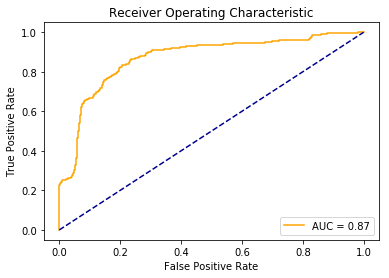

In [39]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2,tpr2,'orange',label='AUC = %0.2f'%roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Multinomial:

In [40]:
##Fitting the Multinomial model:

mn=MultinomialNB()
mn.fit(x_train,y_train)
prediction3=mn.predict(x_test)

In [41]:
#Compute accuracy and display confusion matrix:
print('accuracy in (%):',metrics.accuracy_score(y_test,prediction3)*100)

accuracy in (%): 83.65985827428095


In [42]:
cm3=confusion_matrix(y_test,prediction3)
print('Confusion matrix:',cm3)

Confusion matrix: [[2007    0]
 [ 392    0]]


In [43]:
probs3=mn.predict_proba(x_test)
probs3

array([[0.82773313, 0.17226687],
       [0.82769291, 0.17230709],
       [0.94756033, 0.05243967],
       ...,
       [0.83062493, 0.16937507],
       [0.70429408, 0.29570592],
       [0.79418644, 0.20581356]])

In [44]:
prob_positive3=probs3[:,1]
fpr3,tpr3,threshold3=metrics.roc_curve(y_test,prob_positive3)
roc_auc3=metrics.auc(fpr3,tpr3)
print('Area under the curve',roc_auc3)
print('fpr',fpr3)
print('tpr',tpr3)
print('threshold',threshold3)

Area under the curve 0.7991710136969586
fpr [0.00000000e+00 4.98256104e-04 2.74040857e-02 2.74040857e-02
 2.79023418e-02 2.79023418e-02 2.84005979e-02 2.84005979e-02
 3.08918784e-02 3.08918784e-02 3.43796712e-02 3.43796712e-02
 3.58744395e-02 3.58744395e-02 3.63726956e-02 3.63726956e-02
 3.68709517e-02 3.68709517e-02 3.78674639e-02 3.78674639e-02
 3.83657200e-02 3.83657200e-02 3.88639761e-02 3.88639761e-02
 3.93622322e-02 3.93622322e-02 3.98604883e-02 3.98604883e-02
 4.03587444e-02 4.03587444e-02 4.13552566e-02 4.13552566e-02
 4.23517688e-02 4.23517688e-02 4.58395615e-02 4.58395615e-02
 4.63378176e-02 4.63378176e-02 4.68360737e-02 4.68360737e-02
 4.83308421e-02 4.83308421e-02 5.03238665e-02 5.03238665e-02
 5.08221226e-02 5.08221226e-02 5.13203787e-02 5.13203787e-02
 5.38116592e-02 5.38116592e-02 5.72994519e-02 5.72994519e-02
 5.87942202e-02 5.87942202e-02 5.92924763e-02 5.92924763e-02
 6.07872446e-02 6.07872446e-02 6.12855007e-02 6.12855007e-02
 6.17837569e-02 6.17837569e-02 6.52715496

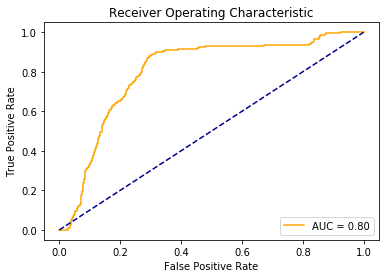

In [45]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3,tpr3,'orange',label='AUC = %0.2f'%roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Bernoulli:

In [46]:
##Fitting the Bernoulli model:

bn=BernoulliNB()
bn.fit(x_train,y_train)
prediction4=bn.predict(x_test)

In [47]:
#Compute accuracy and display confusion matrix:
print('accuracy in (%):',metrics.accuracy_score(y_test,prediction4)*100)

accuracy in (%): 83.65985827428095


In [48]:
cm4=confusion_matrix(y_test,prediction4)
print('Confusion matrix:',cm4)

Confusion matrix: [[2007    0]
 [ 392    0]]


In [49]:
probs4=bn.predict_proba(x_test)
probs4

array([[0.79939861, 0.20060139],
       [0.79939861, 0.20060139],
       [0.98521068, 0.01478932],
       ...,
       [0.79939861, 0.20060139],
       [0.9451089 , 0.0548911 ],
       [0.79939861, 0.20060139]])

In [50]:
prob_positive4=probs4[:,1]
fpr4,tpr4,threshold4=metrics.roc_curve(y_test,prob_positive4)
roc_auc4=metrics.auc(fpr4,tpr4)
print('Area under the curve',roc_auc4)
print('fpr',fpr4)
print('tpr',tpr4)
print('threshold',threshold4)

Area under the curve 0.5788267848245426
fpr [0.         0.0612855  0.73642252 0.73692078 0.75037369 0.89387145
 0.89835575 0.96761335 0.96761335 0.97907324 0.9795715  0.99152965
 0.99850523 1.        ]
tpr [0.         0.05357143 0.90816327 0.90816327 0.91581633 0.96683673
 0.96938776 0.99489796 0.99744898 1.         1.         1.
 1.         1.        ]
threshold [1.20197089 0.20197089 0.20060139 0.20060139 0.06139751 0.06090844
 0.0553347  0.0548911  0.05289492 0.0524698  0.01491395 0.01478932
 0.01265421 0.00330163]


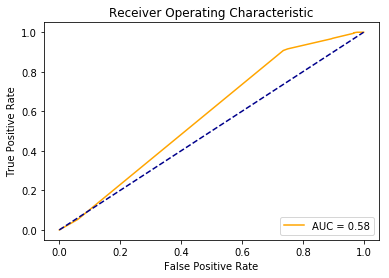

In [51]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr4,tpr4,'orange',label='AUC = %0.2f'%roc_auc4)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree:

In [52]:
##Fitting the Decision Tree model:

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
prediction5=clf.predict(x_test)

In [53]:
#Compute accuracy and display confusion matrix.
cm5=confusion_matrix(y_test,prediction5)
print('Confusion Matrix is:',cm5)

Confusion Matrix is: [[1957   50]
 [  31  361]]


In [54]:
print('Accuracy in %:',metrics.accuracy_score(y_test,prediction5)*100)

Accuracy in %: 96.62359316381826


In [55]:
probs5=clf.predict_proba(x_test)
probs5

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [56]:
prob_positive5=probs5[:,1]
fpr5,tpr5,threshold5=metrics.roc_curve(y_test,prob_positive5)
roc_auc5=metrics.auc(fpr5,tpr5)
print('Area under the curve',roc_auc5)
print('fpr',fpr5)
print('tpr',tpr5)
print('threshold',threshold5)

Area under the curve 0.9480027810825377
fpr [0.         0.02491281 1.        ]
tpr [0.         0.92091837 1.        ]
threshold [2. 1. 0.]


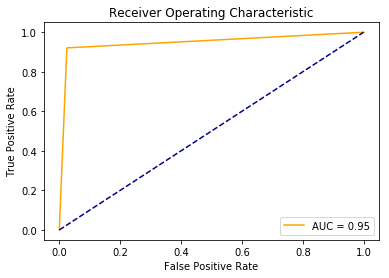

In [57]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr5,tpr5,'orange',label='AUC = %0.2f'%roc_auc5)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest:

In [58]:
##Fitting the Random Forest model:

rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)
prediction6=rf.predict(x_test)

In [59]:
#Compute accuracy and display confusion matrix.
cm6=confusion_matrix(y_test,prediction6)
print('Confusion Matrix is:',cm6)

Confusion Matrix is: [[1999    8]
 [  29  363]]


In [60]:
print('Accuracy in %:',metrics.accuracy_score(y_test,prediction6)*100)

Accuracy in %: 98.45769070446019


In [61]:
probs6=rf.predict_proba(x_test)
probs6

array([[0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.96, 0.04]])

In [62]:
prob_positive6=probs6[:,1]
fpr6,tpr6,threshold6=metrics.roc_curve(y_test,prob_positive6)
roc_auc6=metrics.auc(fpr6,tpr6)
print('Area under the curve',roc_auc6)
print('fpr',fpr6)
print('tpr',tpr6)
print('threshold',threshold6)

Area under the curve 0.979085318731379
fpr [0.00000000e+00 9.96512207e-04 1.49476831e-03 2.49128052e-03
 2.98953662e-03 2.98953662e-03 2.98953662e-03 2.98953662e-03
 2.98953662e-03 2.98953662e-03 2.98953662e-03 2.98953662e-03
 2.98953662e-03 2.98953662e-03 2.98953662e-03 2.98953662e-03
 3.48779273e-03 3.48779273e-03 3.98604883e-03 3.98604883e-03
 5.97907324e-03 5.97907324e-03 8.47035376e-03 9.46686597e-03
 9.96512207e-03 1.09616343e-02 1.39511709e-02 1.44494270e-02
 1.64424514e-02 1.94319880e-02 1.99302441e-02 2.09267564e-02
 2.34180369e-02 2.49128052e-02 2.69058296e-02 3.03936223e-02
 3.48779273e-02 3.73692078e-02 4.18535127e-02 4.88290982e-02
 5.68011958e-02 6.72645740e-02 7.92227205e-02 9.41704036e-02
 1.13104136e-01 1.37518685e-01 1.64424514e-01 2.15744893e-01
 3.02441455e-01 4.59392128e-01 1.00000000e+00]
tpr [0.         0.62244898 0.71428571 0.78316327 0.81887755 0.83928571
 0.8494898  0.85459184 0.85714286 0.86734694 0.87244898 0.88010204
 0.89030612 0.90306122 0.91071429 0.9209

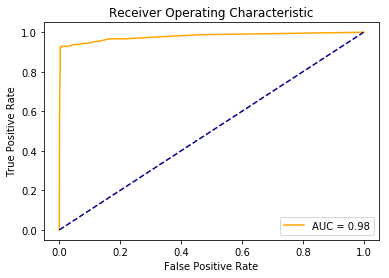

In [63]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr6,tpr6,'orange',label='AUC = %0.2f'%roc_auc6)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Adaboost:

In [64]:
##Fitting the Adaboost model:

ab=AdaBoostClassifier(n_estimators=100)
ab.fit(x_train,y_train)
prediction7=ab.predict(x_test)

In [65]:
#Compute accuracy and display confusion matrix.
cm7=confusion_matrix(y_test,prediction7)
print('Confusion Matrix is:',cm7)

Confusion Matrix is: [[1962   45]
 [  43  349]]


In [66]:
print('Accuracy in %:',metrics.accuracy_score(y_test,prediction7)*100)

Accuracy in %: 96.33180491871613


In [67]:
probs7=ab.predict_proba(x_test)
probs7

array([[0.513302  , 0.486698  ],
       [0.58907426, 0.41092574],
       [0.52267899, 0.47732101],
       ...,
       [0.51438642, 0.48561358],
       [0.67834396, 0.32165604],
       [0.50701396, 0.49298604]])

In [68]:
prob_positive7=probs7[:,1]
fpr7,tpr7,threshold7=metrics.roc_curve(y_test,prob_positive7)
roc_auc7=metrics.auc(fpr7,tpr7)
print('Area under the curve',roc_auc7)
print('fpr',fpr7)
print('tpr',tpr7)
print('threshold',threshold7)

Area under the curve 0.9776102518735447
fpr [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.96512207e-04 9.96512207e-04 1.49476831e-03
 1.49476831e-03 1.49476831e-03 1.49476831e-03 1.49476831e-03
 1.49476831e-03 1.49476831e-03 1.49476831e-03 1.49476831e-03
 1.99302441e-03 1.99302441e-03 1.99302441e-03 1.99302441e-03
 2.49128052e-03 2.49128052e-03 2.49128052e-03 2.49128052e-03
 2.49128052e-03 2.98953662e-03 2.98953662e-03 2.98953662e-03
 2.98953662e-03 3.48779273e-03 3.48779273e-03 3.98604883e-03
 3.98604883e-03 3.98604883e-03 3.98604883

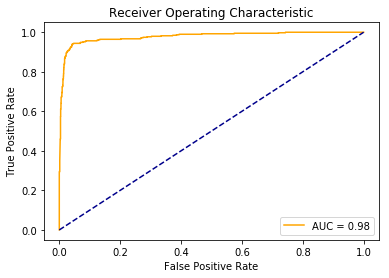

In [69]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr7,tpr7,'orange',label='AUC = %0.2f'%roc_auc7)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting:

In [70]:
##Fitting the Gradient Boosting model:

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
prediction8=gb.predict(x_test)

In [71]:
#Compute accuracy and display confusion matrix.
cm8=confusion_matrix(y_test,prediction8)
print('Confusion Matrix is:',cm8)

Confusion Matrix is: [[1988   19]
 [  28  364]]


In [72]:
print('Accuracy in %:',metrics.accuracy_score(y_test,prediction8)*100)

Accuracy in %: 98.0408503543143


In [73]:
probs8=gb.predict_proba(x_test)
probs8

array([[0.98468648, 0.01531352],
       [0.99413099, 0.00586901],
       [0.99559621, 0.00440379],
       ...,
       [0.99100785, 0.00899215],
       [0.99031602, 0.00968398],
       [0.68996854, 0.31003146]])

In [74]:
prob_positive8=probs8[:,1]
fpr8,tpr8,threshold8=metrics.roc_curve(y_test,prob_positive8)
roc_auc8=metrics.auc(fpr8,tpr8)
print('Area under the curve',roc_auc8)
print('fpr',fpr8)
print('tpr',tpr8)
print('threshold',threshold8)

Area under the curve 0.9876560863508332
fpr [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.98256104e-04
 4.98256104e-04 4.98256104e-04 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 9.96512207e-04 9.96512207e-04
 1.49476831e-03 1.49476831e-03 1.49476831

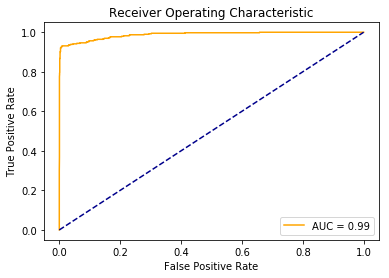

In [75]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr8,tpr8,'orange',label='AUC = %0.2f'%roc_auc8)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XG Boost:

In [76]:
##Fitting the XG Boost model:

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
prediction9=xgb.predict(x_test)

In [77]:
#Compute accuracy and display confusion matrix.
cm9=confusion_matrix(y_test,prediction9)
print('Confusion Matrix is:',cm9)

Confusion Matrix is: [[1990   17]
 [  31  361]]


In [78]:
print('Accuracy in %:',metrics.accuracy_score(y_test,prediction9)*100)

Accuracy in %: 97.99916631929972


In [79]:
probs9=xgb.predict_proba(x_test)
probs9

array([[0.98013073, 0.01986928],
       [0.9960606 , 0.0039394 ],
       [0.99553776, 0.00446225],
       ...,
       [0.98526394, 0.01473608],
       [0.99149746, 0.00850257],
       [0.61647284, 0.38352713]], dtype=float32)

In [80]:
prob_positive9=probs9[:,1]
fpr9,tpr9,threshold9=metrics.roc_curve(y_test,prob_positive9)
roc_auc9=metrics.auc(fpr9,tpr9)
print('Area under the curve',roc_auc9)
print('fpr',fpr9)
print('tpr',tpr9)
print('threshold',threshold9)

Area under the curve 0.9862528344671202
fpr [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 4.98256104e-04 4.98256104e-04
 4.98256104e-04 4.98256104e-04 9.96512207e-04 9.96512207e-04
 9.96512207e-04 9.96512207e-04 9.96512207e-04 9.96512207e-04
 9.96512207e-04 9.96512207e-04 1.49476831e-03 1.49476831e-03
 1.99302441e-03 2.49128052e-03 2.49128052

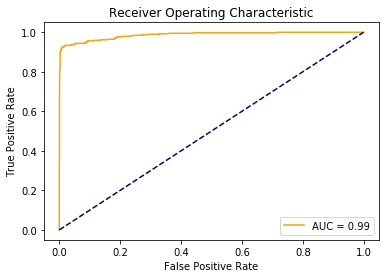

In [81]:
##plot the roc curve:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr9,tpr9,'orange',label='AUC = %0.2f'%roc_auc9)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Which model gives best accuracy and why?

Random Forest is giving 98.45% of accuracy, which is the best accuracy amongst all the models used for this particular case study.
Random forest's best part is that it avoids overfitting as the algorithm gives the advantage to each individual tree to randomly take n sample or data points from the dataset with replacement and resulting in different trees. Therefore random forest forms a collection of decision trees.

### Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s.

No, the accuracy is not a good performance evaluation here for the given data atleast. Rather we should go for the area under the curve, as it measures the quality of a model's prediction. Therefore higher the area under curve the better is the model, so according to that we are seeing that Gradient boosting and XG boost are having 99% coverage. Either we may also use confusion matrix to find out the model which is predicting the best or nearby accuracy depending on the less number of records to be present for both false positives and false negatives.